<h1><center>CLTK (nouvelle version)</center></h1>

In [1]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [16,9]

In [5]:
import pickle

In [18]:
from cltk.data.fetch import FetchCorpus
corpus_downloader = FetchCorpus(language="lat")
print(corpus_downloader.list_corpora)
corpus_downloader.import_corpus("lat_models_cltk")

['lat_text_perseus', 'lat_treebank_perseus', 'lat_text_latin_library', 'phi5', 'phi7', 'latin_proper_names_cltk', 'lat_models_cltk', 'latin_pos_lemmata_cltk', 'latin_treebank_index_thomisticus', 'latin_lexica_perseus', 'latin_training_set_sentence_cltk', 'latin_word2vec_cltk', 'latin_text_antique_digiliblt', 'latin_text_corpus_grammaticorum_latinorum', 'latin_text_poeti_ditalia', 'lat_text_tesserae', 'cltk_lat_lewis_elementary_lexicon']


In [3]:
base_string=open("./texts/aen1.txt").read()

In [ ]:
from cltk import NLP

cltk_nlp = NLP(language="lat")
cltk_nlp.pipeline.processes.pop(-1)

# Dans la dernière version de cltk, il y a un bug ici :https://github.com/cltk/cltk/issues/1113,
# que j'ai corrigé en local
cltk_doc = cltk_nlp.analyze(text= base_string)

In [19]:
print([x for x in dir(cltk_doc) if not x.startswith("__")])

['_get_words_attribute', 'embeddings', 'embeddings_model', 'language', 'lemmata', 'morphosyntactic_features', 'normalized_text', 'pipeline', 'pos', 'raw', 'sentence_embeddings', 'sentences', 'sentences_strings', 'sentences_tokens', 'stanza_doc', 'stems', 'tokens', 'tokens_stops_filtered', 'words']


In [21]:
for lemma, pos in zip(cltk_doc.lemmata, cltk_doc.pos):
    print(lemma+" : "+pos)

vox_breviata : NUM
: : PUNCT
meneid : NOUN
num._rom. : NUM
P. : NOUN
momo : NOUN
momnmmn : PROPN
momomm : PROPN
momo : NOUN
PRIMVS : PUNCT
Arma : NOUN
virum : NOUN
canor : VERB
, : PUNCT
rroia : PROPN
qui : PRON
primus : ADJ
ab : ADP
oris : NOUN
mtalius : ADJ
, : PUNCT
fatum : NOUN
profugus : NOUN
, : PUNCT
maviniaquus : NOUN
venio : VERB
litora : NOUN
, : PUNCT
multum : ADV
ille : PRON
et : CCONJ
terra : NOUN
iacto : VERB
et : CCONJ
altus : NOUN
vis : NOUN
superior : NOUN
saevus : ADJ
memor : NOUN
muno : PROPN
ob : ADP
ira : NOUN
; : PUNCT
multus : ADJ
quoque : ADV
et : CCONJ
bellum : NOUN
patior : VERB
, : PUNCT
dum : SCONJ
condo : VERB
urbs : NOUN
, : PUNCT
num._arab. : NUM
inferro : VERB
deus : NOUN
Latio : NOUN
, : PUNCT
genus : NOUN
unde : ADV
matinus : ADJ
, : PUNCT
mlbanique : ADJ
pater : NOUN
, : PUNCT
atque : CCONJ
altus : ADJ
moenium : NOUN
moma : NOUN
. : PUNCT
Musa : NOUN
, : PUNCT
ego : PRON
causa : NOUN
memo : VERB
, : PUNCT
qui : PRON
numen : NOUN
laeno : VERB
, : PUNCT

saeculum : NOUN
bonlus : ADJ
; : PUNCT
cana : NOUN
Fides : NOUN
, : PUNCT
et : CCONJ
mesta : NOUN
, : PUNCT
memo : NOUN
cum : ADP
frater : NOUN
Quirinus : ADJ
, : PUNCT
iura : NOUN
do : VERB
; : PUNCT
dira : NOUN
ferrum : NOUN
et : CCONJ
compagi : NOUN
ars : NOUN
claudeo : VERB
mellum : NOUN
porta : NOUN
; : PUNCT
Furor : NOUN
impius : ADJ
insum : VERB
, : PUNCT
saevus : NOUN
sedeo : VERB
super : ADP
arma : NOUN
, : PUNCT
et : CCONJ
centum : NUM
vinco : VERB
aenis : NOUN
num._arab. : NUM
post : ADP
tergum : NOUN
nodus : NOUN
, : PUNCT
fremo : VERB
horridus : ADJ
os : NOUN
cruo : VERB
. : PUNCT
' : PUNCT
ego : PRON
aa : VERB
, : PUNCT
et : CCONJ
Maia : PROPN
gigno : VERB
demitto : VERB
ab : ADP
altus : ADJ
, : PUNCT
ut : SCONJ
terra : NOUN
, : PUNCT
utque : SCONJ
novus : ADJ
pateo : VERB
marthagina : NOUN
arx : NOUN
hospitio : NOUN
meucris : NOUN
, : PUNCT
ne : SCONJ
fatum : NOUN
nescia : NOUN
Dido : NOUN
finis : NOUN
arceo : VERB
: : PUNCT
volo : VERB
ille : PRON
per : ADP
aera : NOUN


nos : PRON
aut : CCONJ
ferrum : NOUN
mibycus : ADJ
popularis : ADJ
menatizo : VERB
venio : VERB
, : PUNCT
aut : CCONJ
rapio : VERB
ad : ADP
litora : NOUN
verto : VERB
praeda : NOUN
; : PUNCT
non : ADV
is : PRON
vis : NOUN
animus : NOUN
, : PUNCT
nec : CCONJ
tantus : PRON
superbia : NOUN
victus : NOUN
. : PUNCT
sum : AUX
locus : NOUN
, : PUNCT
mesperius : NOUN
mra : NOUN
cognominus : NOUN
dico : VERB
, : PUNCT
num._arab. : NUM
terra : NOUN
antiquus : ADJ
, : PUNCT
possum : VERB
arma : NOUN
atque : CCONJ
ubus : NOUN
glaeba : NOUN
; : PUNCT
nenotri : PROPN
colo : VERB
vir : NOUN
; : PUNCT
nunc : ADV
fama : NOUN
parvus : ADJ
mtalia : NOUN
dico : VERB
dux : NOUN
de : ADP
nomen : NOUN
gens : NOUN
. : PUNCT
ego : PRON
cursus : NOUN
sum : VERB
: : PUNCT
cum : SCONJ
subito : NOUN
assurgo : VERB
fluctus : NOUN
nimbosus : ADJ
Orion : NOUN
num._arab. : NUM
in : ADP
vada : NOUN
caecus : ADJ
tolo : VERB
, : PUNCT
penitusque : ADV
procacio : VERB
austrum : NOUN
perque : ADP
unda : NOUN
, : PUNCT
supe

In [32]:
for form,morph in zip(cltk_doc.tokens,cltk_doc.morphosyntactic_features) :
    print(form+" : "+str(morph))

Vergil : {NumForm: [digit]}
: : {}
Aeneid : {Abbreviation: [pos]}
I : {NumForm: [digit]}
P. : {Abbreviation: [pos]}
VERGILI : {Degree: [positive], Gender: [masculine], Number: [singular]}
MARONIS : {Case: [genitive], Degree: [positive], Gender: [masculine], Number: [singular]}
AENEIDOS : {Case: [genitive], Degree: [positive], Gender: [masculine], Number: [singular]}
LIBER : {Case: [nominative], Degree: [positive], Gender: [masculine], Number: [singular]}
PRIMVS : {}
Arma : {Case: [nominative], Degree: [positive], Gender: [neuter], Number: [plural]}
virumque : {Case: [accusative], Degree: [positive], Gender: [masculine], Number: [singular]}
cano : {Mood: [indicative], Number: [singular], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}
, : {}
Troiae : {Case: [genitive], Degree: [positive], Gender: [masculine], Number: [singular]}
qui : {Case: [nominative], Degree: [positive], Gender: [masculine], Number: [singular], PrononimalType: [relative]}
primus : {Case: [nom

regno : {Case: [ablative], Degree: [positive], Gender: [neuter], Number: [singular]}
, : {}
— : {}
triginta : {Numeral: [cardinal]}
magnos : {Case: [accusative], Degree: [positive], Gender: [masculine], Number: [plural]}
volvendis : {Case: [ablative], Degree: [positive], Gender: [neuter], Number: [plural], VerbForm: [gerundive], Voice: [passive]}
mensibus : {Case: [ablative], Degree: [positive], Gender: [feminine], Number: [plural]}
orbis : {Case: [genitive], Degree: [positive], Gender: [masculine], Number: [singular]}
imperio : {Case: [ablative], Degree: [positive], Gender: [neuter], Number: [singular]}
explebit : {Mood: [indicative], Number: [singular], Person: [third], Tense: [future], VerbForm: [finite], Voice: [active]}
, : {}
regnumque : {Case: [accusative], Degree: [positive], Gender: [neuter], Number: [singular]}
ab : {AdpositionalType: [preposition]}
sede : {Case: [ablative], Degree: [positive], Gender: [feminine], Number: [singular]}
Lavini : {Case: [genitive], Degree: [posit

exanimumque : {Case: [accusative], Degree: [absolute_superlative], Gender: [neuter], Number: [singular]}
auro : {Case: [ablative], Degree: [positive], Gender: [neuter], Number: [singular]}
corpus : {Case: [accusative], Degree: [positive], Gender: [neuter], Number: [singular]}
vendebat : {Aspect: [imperfective], Mood: [indicative], Number: [singular], Person: [third], Tense: [imperfect], VerbForm: [finite], Voice: [active]}
Achilles : {Case: [nominative], Degree: [positive], Gender: [masculine], Number: [singular]}
. : {}
Tum : {}
vero : {Degree: [positive]}
ingentem : {Case: [accusative], Degree: [positive], Gender: [masculine], Number: [singular]}
gemitum : {Case: [accusative], Degree: [positive], Gender: [masculine], Number: [singular]}
dat : {Mood: [indicative], Number: [singular], Person: [third], Tense: [present], VerbForm: [finite], Voice: [active]}
pectore : {Case: [dative], Degree: [positive], Gender: [masculine], Number: [singular]}
ab : {AdpositionalType: [preposition]}
imo :

amore : {Case: [ablative], Degree: [positive], Gender: [masculine], Number: [singular]}
iam : {}
pridem : {}
resides : {Mood: [indicative], Number: [plural], Person: [second], Tense: [present], VerbForm: [finite], Voice: [active]}
animos : {Case: [accusative], Degree: [positive], Gender: [masculine], Number: [plural]}
desuetaque : {Case: [accusative], Degree: [absolute_superlative], Gender: [neuter], Number: [plural]}
corda : {Case: [accusative], Degree: [positive], Gender: [neuter], Number: [plural]}
. : {}
Postquam : {}
prima : {Case: [nominative], Degree: [positive], Gender: [feminine], Numeral: [ordinal], Number: [singular]}
quies : {Case: [nominative], Degree: [positive], Gender: [feminine], Number: [singular]}
epulis : {Case: [dative], Degree: [positive], Gender: [masculine], Number: [plural]}
, : {}
mensaeque : {Case: [nominative], Degree: [positive], Gender: [feminine], Number: [singular]}
remotae : {Aspect: [perfective], Case: [nominative], Degree: [positive], Gender: [feminin

In [9]:
filename = 'cltkdoc'
outfile = open(filename,'wb')
pickle.dump(cltk_doc,outfile)
outfile.close()

In [14]:
nouns=0
propers=0
vbs=0
adjs=0
conjs=0
    
for element in cltk_doc.pos :
    if element=="PROPN":
        propers+=1
    elif element=="NOUN":
        nouns+=1
    elif element=="VERB":
        vbs+=1
    elif element=="ADJ":
        adjs+=1
    elif element=="CCONJ":
        conjs+=1

In [15]:
total_len=nouns+vbs+adjs+conjs+propers
nNames=(nouns*100)/total_len
nVerbs=(vbs*100)/total_len
nAdjectives=(adjs*100)/total_len
nConj=(conjs*100)/total_len
nPropers=(propers*100)/total_len
parts=[nNames,nVerbs,nConj,nAdjectives,nPropers]

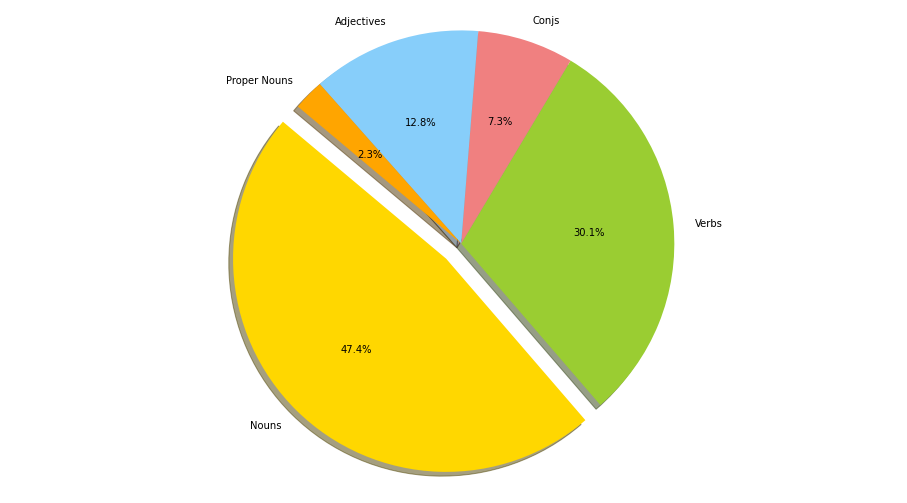

In [16]:
labels = 'Nouns','Verbs','Conjs','Adjectives','Proper Nouns'
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0,0,0 )
plt.pie(parts, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.show()